<a href="https://colab.research.google.com/github/mervegb/deep-learning/blob/main/text_classification_bigrams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

Classification is used to predict a categorical output or a label. It could be if an email is spam or not spam, if a tumor is malignant or benign, if a picture contains a cat or a dog, and so on.

# Loss Functions

For regression you might want mean absolute or mean squared error

For classification you might want binary cross entropy or cross entropy

# Cross Entropy Loss

It measures the performance of a classification model whose output is a probbility value between 0 and 1

# Binary Cross Entropy

It measures the error between the model's predictions and true values for problems with just two classes


Suppose you are predicting whether it will rain tomorrow or not. Your model will output a number between 0 and 1, representing the probability that it will rain. If it outputs 0.8, for example, it means there's an 80% chance it will rain tomorrow.

Now, the question is: how do we measure if this prediction is good or bad? This is where Binary Cross Entropy (BCE) comes in. The BCE loss will tell you how much the predicted probability diverges from the actual outcome (which can be either 0 or 1 - either it rains or it doesn't).


Suppose your model predicts 0.8 (it's going to rain), but actually, it doesn't rain. The loss is calculated using the BCE formula and will be a larger number because the model's prediction was far from reality. Conversely, if the model predicts 0.2 (it's probably not going to rain), and it doesn't rain, then the BCE loss will be smaller.

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from collections import Counter
import numpy as np

#Toy Corpus
corpus = "hello world hello machine"

#Tokenization => separating a piece of text into smaller units called tokens
tokens = corpus.split()
print(tokens)

['hello', 'world', 'hello', 'machine']


In [16]:
# Build Vocabulary and Index-Word Mapping
vocab = set(tokens)
word_to_idx = {word: i for i, word in enumerate(vocab)}
print(word_to_idx)

idx_to_word = {i: word for word, i in word_to_idx.items()}
print(idx_to_word)

vocab_size=len(vocab)
print(vocab_size)

{'is': 0, 'fun.': 1, 'love': 2, 'coding.': 3, 'i': 4, 'learning.': 5, 'coding': 6}
{0: 'is', 1: 'fun.', 2: 'love', 3: 'coding.', 4: 'i', 5: 'learning.', 6: 'coding'}
7


# One-Hot Encoding
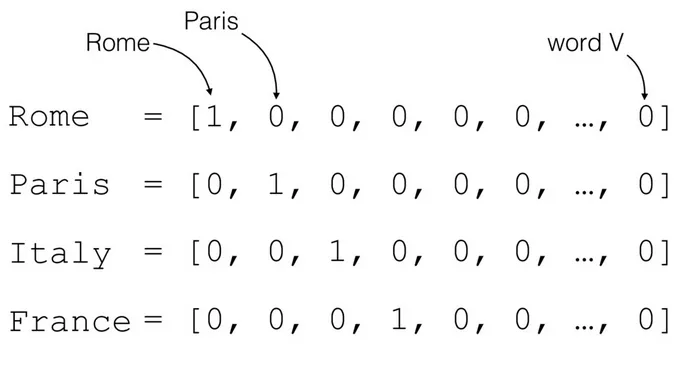)

# Word Embeddings
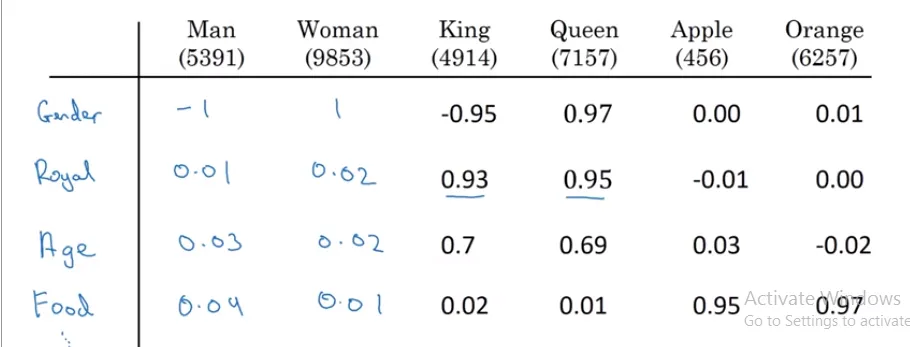

# One Hot Encoding:

- For a vocabulary of N unique words, each one-hot encoded vector has N dimensions, making it computationally expensive

- The method does not capture any semantic relationships between words. In this representation, every word is equally distant from every other word, which is often not meaningful.


# Word Embeddings
- Unlike one-hot encoding, embeddings usually need to be trained on a specific task, which could be computationally expensive.

- The method adds an additional layer to the neural network, which might make the model harder to interpret.

In [31]:
#Create Bigrams
bigrams = [(tokens[i], tokens[i+1]) for i in  range(len(tokens) - 1)]
print(bigrams)

[('hello', 'world'), ('world', 'hello'), ('hello', 'machine')]


In [32]:
#Model Definition
class BigramModel(nn.Module):
  def __init__(self, vocab_size, embed_size):
    super(BigramModel, self).__init__()
    self.embedding = nn.Embedding(vocab_size, embed_size)
    self.linear = nn.Linear(embed_size, vocab_size)


  def forward(self,x):
    out = self.embedding(x)
    out = self.linear(out)
    return out

In [1]:
embed_size = 10
learning_rate = 0.01
epochs = 100

In [34]:
# Initialize Model, Loss, and Optimizer
model = BigramModel(vocab_size, embed_size)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [37]:
#Training
#context_tensor is used to represent the input or context that the model uses to make a prediction, and target_tensor is what you want the model to predict. Both are crucial for supervised learning tasks in NLP.

for epoch in range(epochs):
  total_loss = 0

  for context, target in bigrams:
    context_tensor = torch.tensor(word_to_idx[context], dtype=torch.long)
    target_tensor = torch.tensor([word_to_idx[target]], dtype=torch.long)

    optimizer.zero_grad()
    output = model(context_tensor)
    loss = loss_fn(output.view(1, -1), target_tensor)
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

  if (epoch+1) % 10 == 0:
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(bigrams):.4f}')


Epoch [10/100], Loss: 0.7539
Epoch [20/100], Loss: 0.6346
Epoch [30/100], Loss: 0.5894
Epoch [40/100], Loss: 0.5651
Epoch [50/100], Loss: 0.5497
Epoch [60/100], Loss: 0.5392
Epoch [70/100], Loss: 0.5315
Epoch [80/100], Loss: 0.5257
Epoch [90/100], Loss: 0.5212
Epoch [100/100], Loss: 0.5176


In [41]:
#Test the model
context = "hello"
context_tensor = torch.tensor(word_to_idx[context], dtype=torch.long)
output = model(context_tensor)
_, predicted = torch.max(output.data,0)

print(f"Next word prediction for '{context}' is '{idx_to_word[predicted.item()]}'")

Next word prediction for 'hello' is 'machine'


In [22]:
# Predict the Next Word Using Trigrams
#My task is to create a neural network model that predicts the next word in a sentence based on the previous two words (trigram model) instead of just one (bigram model).

text = "I love coding. Coding is fun. I love learning."

tokens = text.lower().split()
trigrams = [(tokens[i], tokens[i+1], tokens[i+2]) for i in range(len(tokens)-2)]


# Create word-to-index mapping
vocab = set(tokens)
word_to_index = {word: i for i, word in enumerate(vocab)}

vocab_size=len(vocab)

# Create Tensors
context_data = [(word_to_index[trigram[0]], word_to_index[trigram[1]]) for trigram in trigrams]
target_data = [word_to_index[trigram[2]] for trigram in trigrams]

context_tensor = torch.tensor(context_data, dtype=torch.long)
target_tensor = torch.tensor(target_data, dtype=torch.long)

#Model uses embedding layer to convert words to vectors and linear layer to generate predictions
class TrigramModel(nn.Module):
    def __init__(self, vocab_size, embed_size):
        super(TrigramModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.linear = nn.Linear(embed_size * 2, vocab_size)  # 2 words in context, hence embed_size * 2

    def forward(self, x):
        embeds = self.embedding(x)
        embeds = embeds.view((embeds.shape[0], -1))  # Flattening: from [batch_size, 2, embed_size] to [batch_size, 2 * embed_size]
        out = self.linear(embeds)
        return out


#For binary classification, the output size can be 1. For multi-class classification, it matches the number of classes.

trigram_model = TrigramModel(vocab_size, embed_size)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(trigram_model.parameters(), lr=learning_rate)

#Training
#context_tensor is used to represent the input or context that the model uses to make a prediction, and target_tensor is what you want the model to predict. Both are crucial for supervised learning tasks in NLP.

for epoch in range(epochs):
  total_loss = 0

  for word1, word2, target in trigrams:
    context_tensor = torch.tensor([[word_to_index[word1], word_to_index[word2]]], dtype=torch.long)  # Note the extra brackets
    target_tensor = torch.tensor([word_to_index[target]], dtype=torch.long)

    optimizer.zero_grad()
    output = trigram_model(context_tensor)
    loss = loss_fn(output, target_tensor)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Testing: Predict the next word
with torch.no_grad():
    context = ('coding', 'is')
    context_indices = torch.tensor([word_to_index[w] for w in context], dtype=torch.long).unsqueeze(0)
    predict = trigram_model(context_indices)
    predicted_index = torch.argmax(predict).item()
    predicted_word = [word for word, index in word_to_index.items() if index == predicted_index]
    print(f'Predicted word for context {context} is {predicted_word}')

Epoch [10/100], Loss: 1.1435
Epoch [10/100], Loss: 0.7608
Epoch [10/100], Loss: 0.5381
Epoch [10/100], Loss: 1.1194
Epoch [10/100], Loss: 1.4144
Epoch [10/100], Loss: 1.0290
Epoch [10/100], Loss: 1.2276
Epoch [20/100], Loss: 1.0052
Epoch [20/100], Loss: 0.3970
Epoch [20/100], Loss: 0.2902
Epoch [20/100], Loss: 0.5406
Epoch [20/100], Loss: 0.7184
Epoch [20/100], Loss: 0.5392
Epoch [20/100], Loss: 1.0355
Epoch [30/100], Loss: 0.9324
Epoch [30/100], Loss: 0.2478
Epoch [30/100], Loss: 0.1883
Epoch [30/100], Loss: 0.3161
Epoch [30/100], Loss: 0.4074
Epoch [30/100], Loss: 0.3278
Epoch [30/100], Loss: 0.9413
Epoch [40/100], Loss: 0.8879
Epoch [40/100], Loss: 0.1743
Epoch [40/100], Loss: 0.1359
Epoch [40/100], Loss: 0.2129
Epoch [40/100], Loss: 0.2651
Epoch [40/100], Loss: 0.2248
Epoch [40/100], Loss: 0.8903
Epoch [50/100], Loss: 0.8590
Epoch [50/100], Loss: 0.1322
Epoch [50/100], Loss: 0.1048
Epoch [50/100], Loss: 0.1568
Epoch [50/100], Loss: 0.1905
Epoch [50/100], Loss: 0.1672
Epoch [50/100]